# My Awesome Project! Breast Cancer Classification using Machine Learning!



# Table of Contents

* [1. Introduction](#1.-Introduction-&-Problem-Definition)
* [2. Data Collection](#2.-Data-Collection)
    * [2.1 Loading the Dataset](#2.1-Loading-the-Data)
* [3. Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
    * [3.1 Feature Distributions](#3.1-Feature-Distribution)
    * [3.2 Correlation Analysis](#3.2-Correlation-Analysis)
* [4. Data Preprocessing](#4.-Data-Preprocessing)
    * [4.1 Handling Missing Values](#4.1-Handling-Missing-Values)
    * [4.2 Feature Scaling](#4.1-Handling-Missing-Values)
* [5. Model Training](#5.-Model-Training)
* [6. Model Evaluation](#6.-Model-Evaluation)
* [7. Conclusion](#7.-Conclusion)

 ## 1. Introduction & Problem Definition

In this Jupyter Notebook we'll dive into a Binary Classification Problem on Breast Cancer Wisconsin Dataset


In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_breast_cancer

The [`sklearn.datasets.load_breast_cancer()` ](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)function in scikit-learn loads the Breast Cancer Wisconsin (Diagnostic) dataset. This [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) is a classic for binary classification, where the goal is to predict whether a tumor is benign ($1$, non-cancerous) or malignant ($0$, cancerous).

The dataset contains 30 features, which are real-valued measurements calculated from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of the cell nuclei present in the image. For each of the 10 basic features, three values are provided: the mean, standard error (SE), and "worst" (or largest) value. This results in 30 features in total.

<img src="images/fine-needle-aspiration-fna.jpg">

<hr>


##### Digitized FNA image from a Microscope
<img src="images/fna-digitized-image.jpg">

<li>
    (a) Benign (non-cancerous) numerical symbol $(1)$
</li>
<li>
    (b) Malignant (concerous) numerical symbol $(0)$
</li>

Our Goal is, To classify Whether a Lump is affected by Cancer (0, Malignant) or not (1, Benign)

## 2. Data Collection

As we Discussed Earlier, We will use The Data from `sklearn.datasets`  and we can use `load_breast_cancer().DESCR` to obtain detailed information about the Dataset, like its <br>source, features and their explanation

In [2]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["diagnosis"] = cancer.target

In [3]:
#printing the Data is important here, you can try not printing it! 
print(cancer.DESCR)
#cancer.DESCR

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# or even better use Markdown to display it nicer

from IPython.display import Markdown

Markdown(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign

:Summary Statistics:

===================================== ====== ======
                                        Min    Max
===================================== ====== ======
radius (mean):                        6.981  28.11
texture (mean):                       9.71   39.28
perimeter (mean):                     43.79  188.5
area (mean):                          143.5  2501.0
smoothness (mean):                    0.053  0.163
compactness (mean):                   0.019  0.345
concavity (mean):                     0.0    0.427
concave points (mean):                0.0    0.201
symmetry (mean):                      0.106  0.304
fractal dimension (mean):             0.05   0.097
radius (standard error):              0.112  2.873
texture (standard error):             0.36   4.885
perimeter (standard error):           0.757  21.98
area (standard error):                6.802  542.2
smoothness (standard error):          0.002  0.031
compactness (standard error):         0.002  0.135
concavity (standard error):           0.0    0.396
concave points (standard error):      0.0    0.053
symmetry (standard error):            0.008  0.079
fractal dimension (standard error):   0.001  0.03
radius (worst):                       7.93   36.04
texture (worst):                      12.02  49.54
perimeter (worst):                    50.41  251.2
area (worst):                         185.2  4254.0
smoothness (worst):                   0.071  0.223
compactness (worst):                  0.027  1.058
concavity (worst):                    0.0    1.252
concave points (worst):               0.0    0.291
symmetry (worst):                     0.156  0.664
fractal dimension (worst):            0.055  0.208
===================================== ====== ======

:Missing Attribute Values: None

:Class Distribution: 212 - Malignant, 357 - Benign

:Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

:Donor: Nick Street

:Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. dropdown:: References

  - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction
    for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on
    Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
    San Jose, CA, 1993.
  - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and
    prognosis via linear programming. Operations Research, 43(4), pages 570-577,
    July-August 1995.
  - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
    to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994)
    163-171.


In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Alright now that We know Know its creators and some info about it, why not perform Exploratory Data Analysis

## 2.1 Loading the Data

## 3. Exploratory Data Analysis (EDA)

In [6]:
#first let's see first 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# to see all the columns we would need to configure pandas to show all columns

pd.set_option("display.max_columns", None)

# now we can see all columns
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
mean, median = pd.DataFrame([df.mean(), df.median()], index=["Mean", "Median"]).sum(axis=1)
mean, median

(1857.3487867057997, 1524.9811170000003)

<img src="images/mean-median-mode-difference-between-mean-and-median.png">

In [10]:
absolute_difference = np.abs(mean - median)

average_sum = (mean + median) / 2

percentage_difference = absolute_difference * 100/(average_sum)

print(f"Percentage Difference: {percentage_difference:.2f}%")

Percentage Difference: 19.65%


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

We Notice that there are no missing Value so "Hooray!!" our lives are easier, second thing is all columns use float64 except diagnosis which has data type of Int64, so it falls to us and wether we want less percision, or more percesion, as well as maintaining the same data types once we start implementing the model.

In [12]:

df.groupby(["diagnosis"])["mean radius"].max()

diagnosis
0    28.11
1    17.85
Name: mean radius, dtype: float64

In [13]:
df.groupby(["diagnosis"])["worst radius"].max()

diagnosis
0    36.04
1    19.82
Name: worst radius, dtype: float64

In [14]:
diagnosis_count = df["diagnosis"].value_counts()
diagnosis_count

diagnosis
1    357
0    212
Name: count, dtype: int64

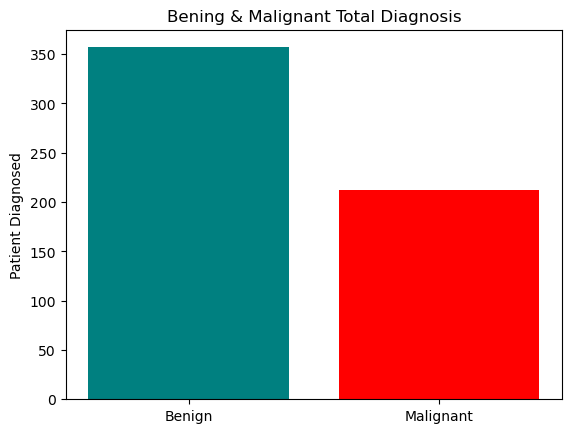

In [15]:
target_map = ["Benign", "Malignant"]

targeted = {
    0: "M:Cancerous",
    1:"B:Non-Cancerous"
}


plt.bar(x = target_map, height=diagnosis_count, color=["teal", "red"])
plt.title("Bening & Malignant Total Diagnosis")
plt.ylabel("Patient Diagnosed")
plt.show()

In [16]:
# propotions of diagnosis, we notice that, 63% are Benign, and that the Data isn't Balanced
df["diagnosis"].value_counts(normalize=True) * 100

diagnosis
1    62.741652
0    37.258348
Name: proportion, dtype: float64

Let's Plot all features's Distrubutions at once!

In [17]:
df_features = df.drop("diagnosis", axis=1)


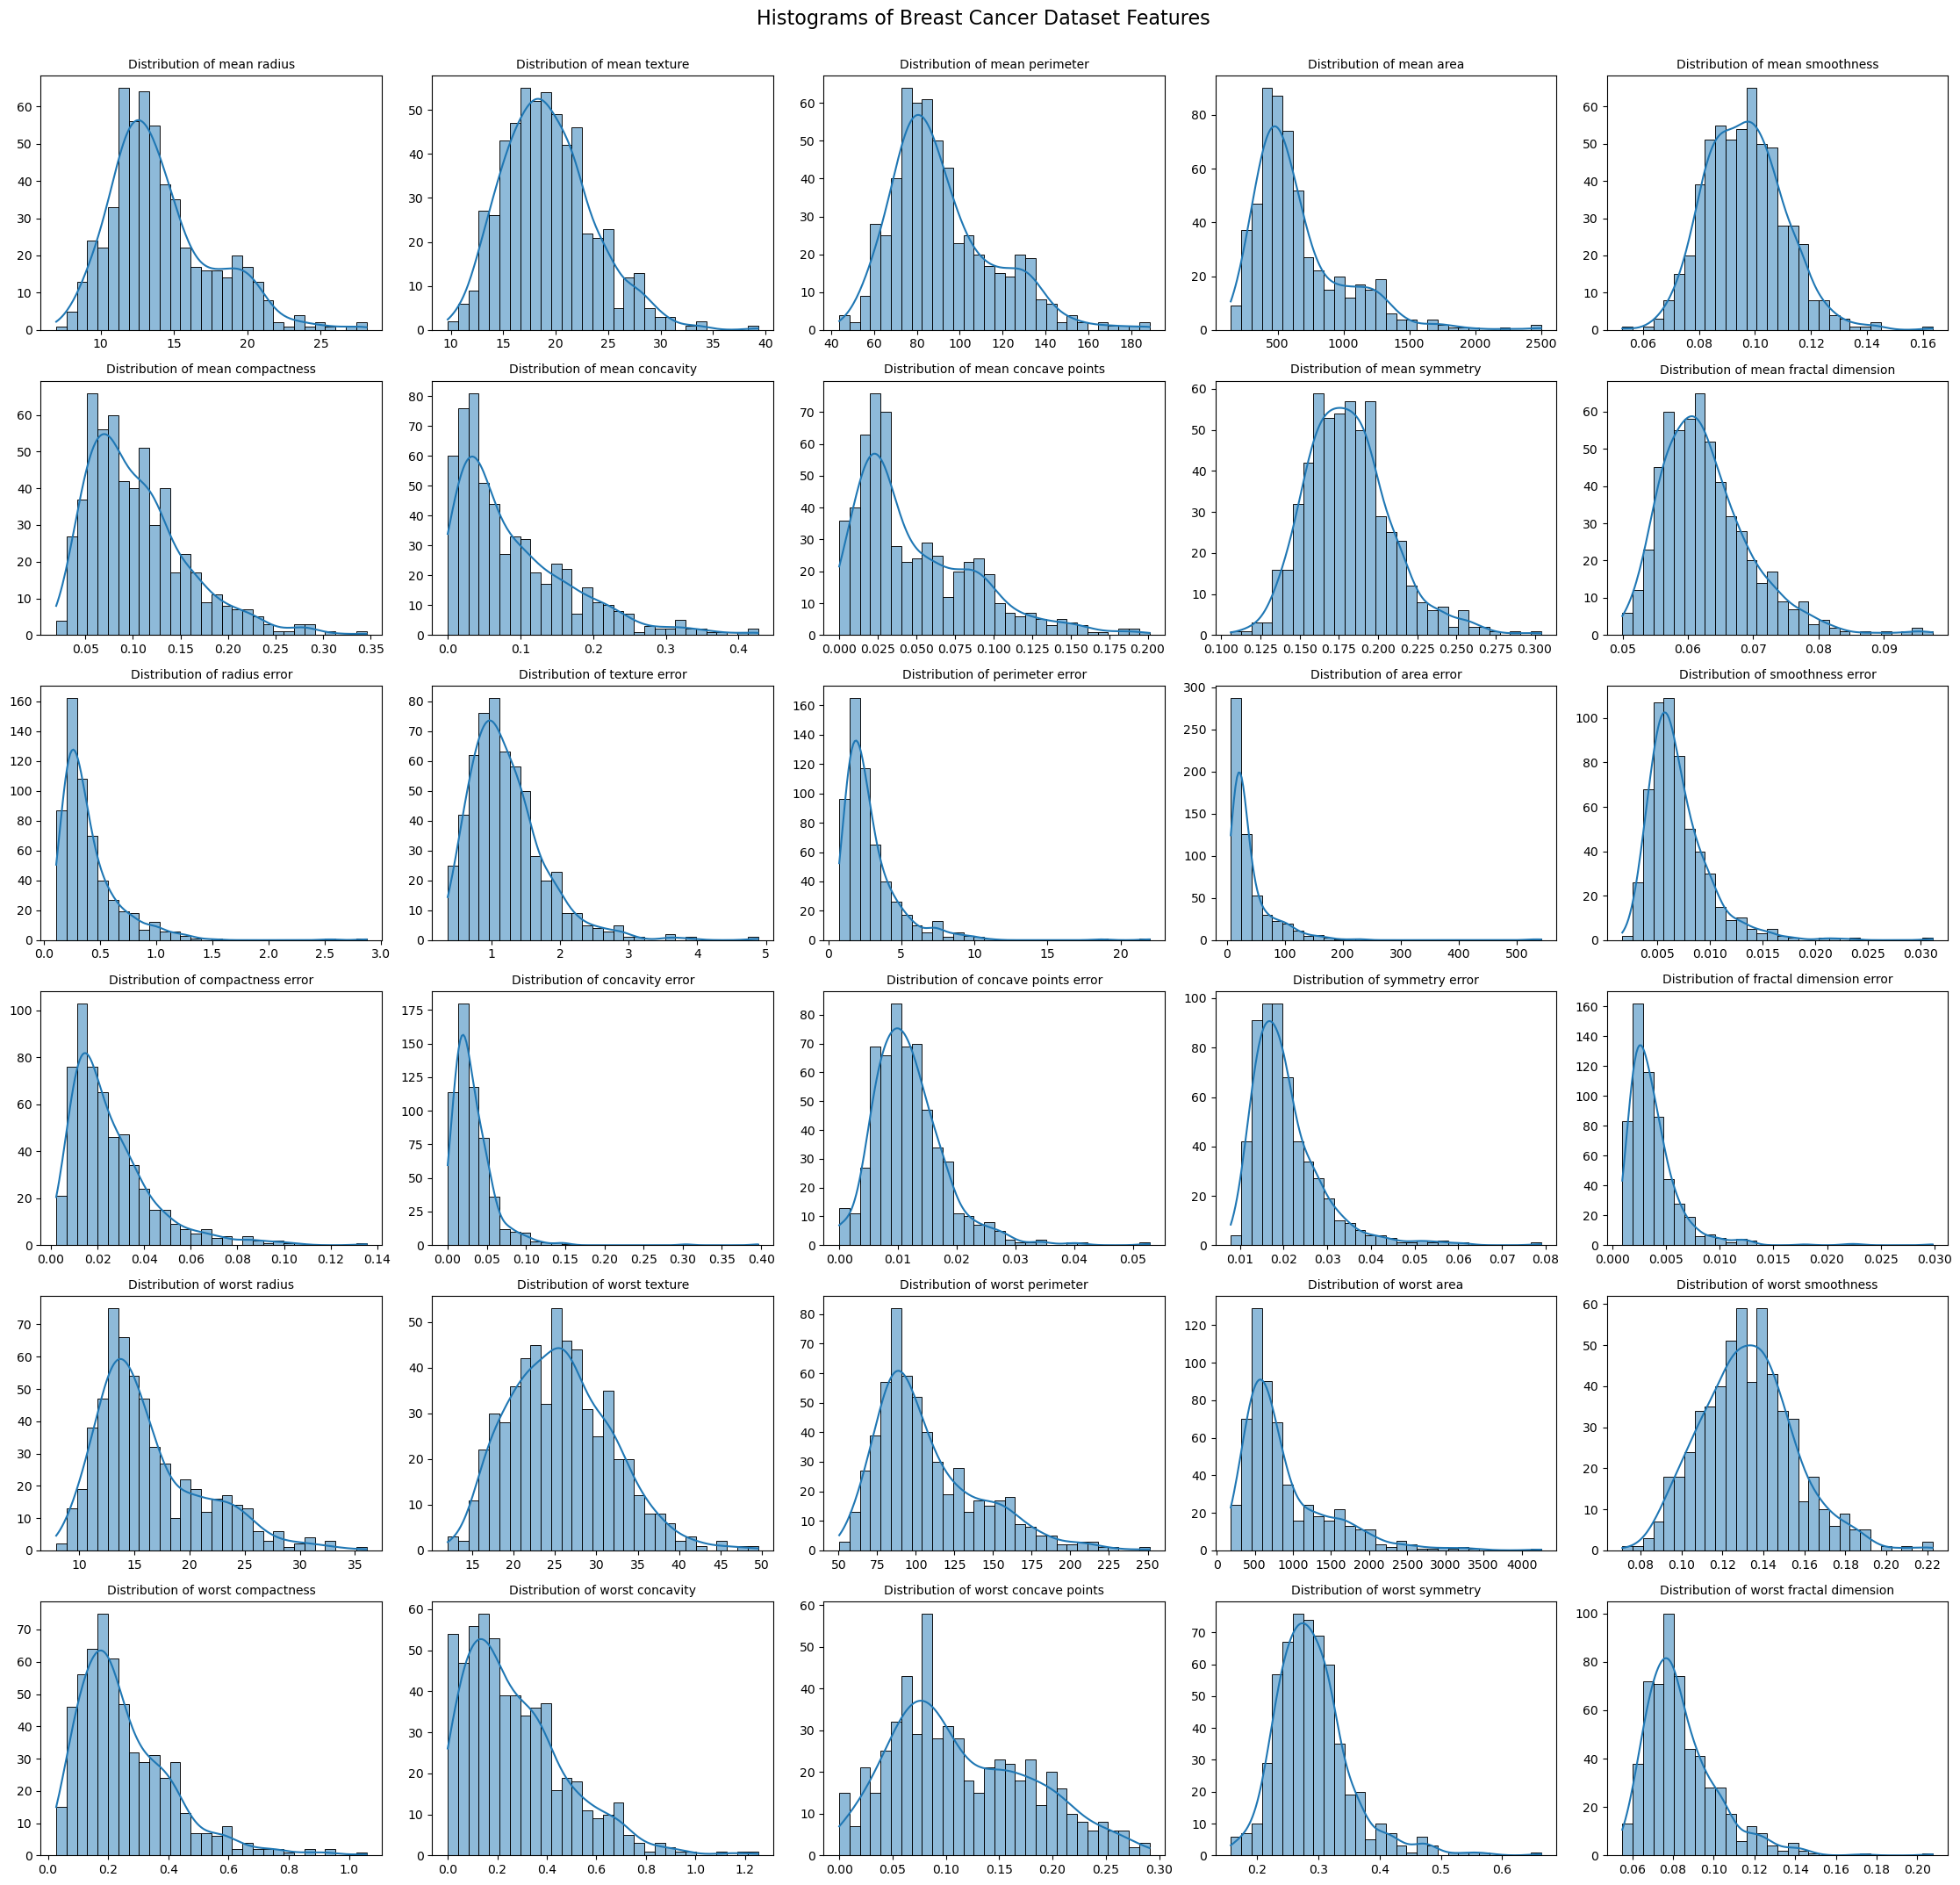

In [18]:
num_features = df_features.shape[1]
n_cols = 5
n_rows = (num_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4.5, n_rows * 3.5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through each feature and plot its histogram
for i, feature_name in enumerate(df_features.columns):
    ax = axes[i]
    sns.histplot(df_features[feature_name], kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {feature_name}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')


plt.tight_layout()
plt.suptitle('Histograms of Breast Cancer Dataset Features', y=1.02, fontsize=16)
plt.savefig("images/BC-histograms.png", transparent=True)

plt.show()

### Bivariate Analysis: Features Vs. Target (diagnosis)!

In [19]:
# Let's map our diagnosis columns 0 to Malignant and 1 to Benign
df["diagnosis"] = df["diagnosis"].map({0:cancer.target_names[0],1:cancer.target_names[1]})
df["diagnosis"].head(10)

0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
5    malignant
6    malignant
7    malignant
8    malignant
9    malignant
Name: diagnosis, dtype: object

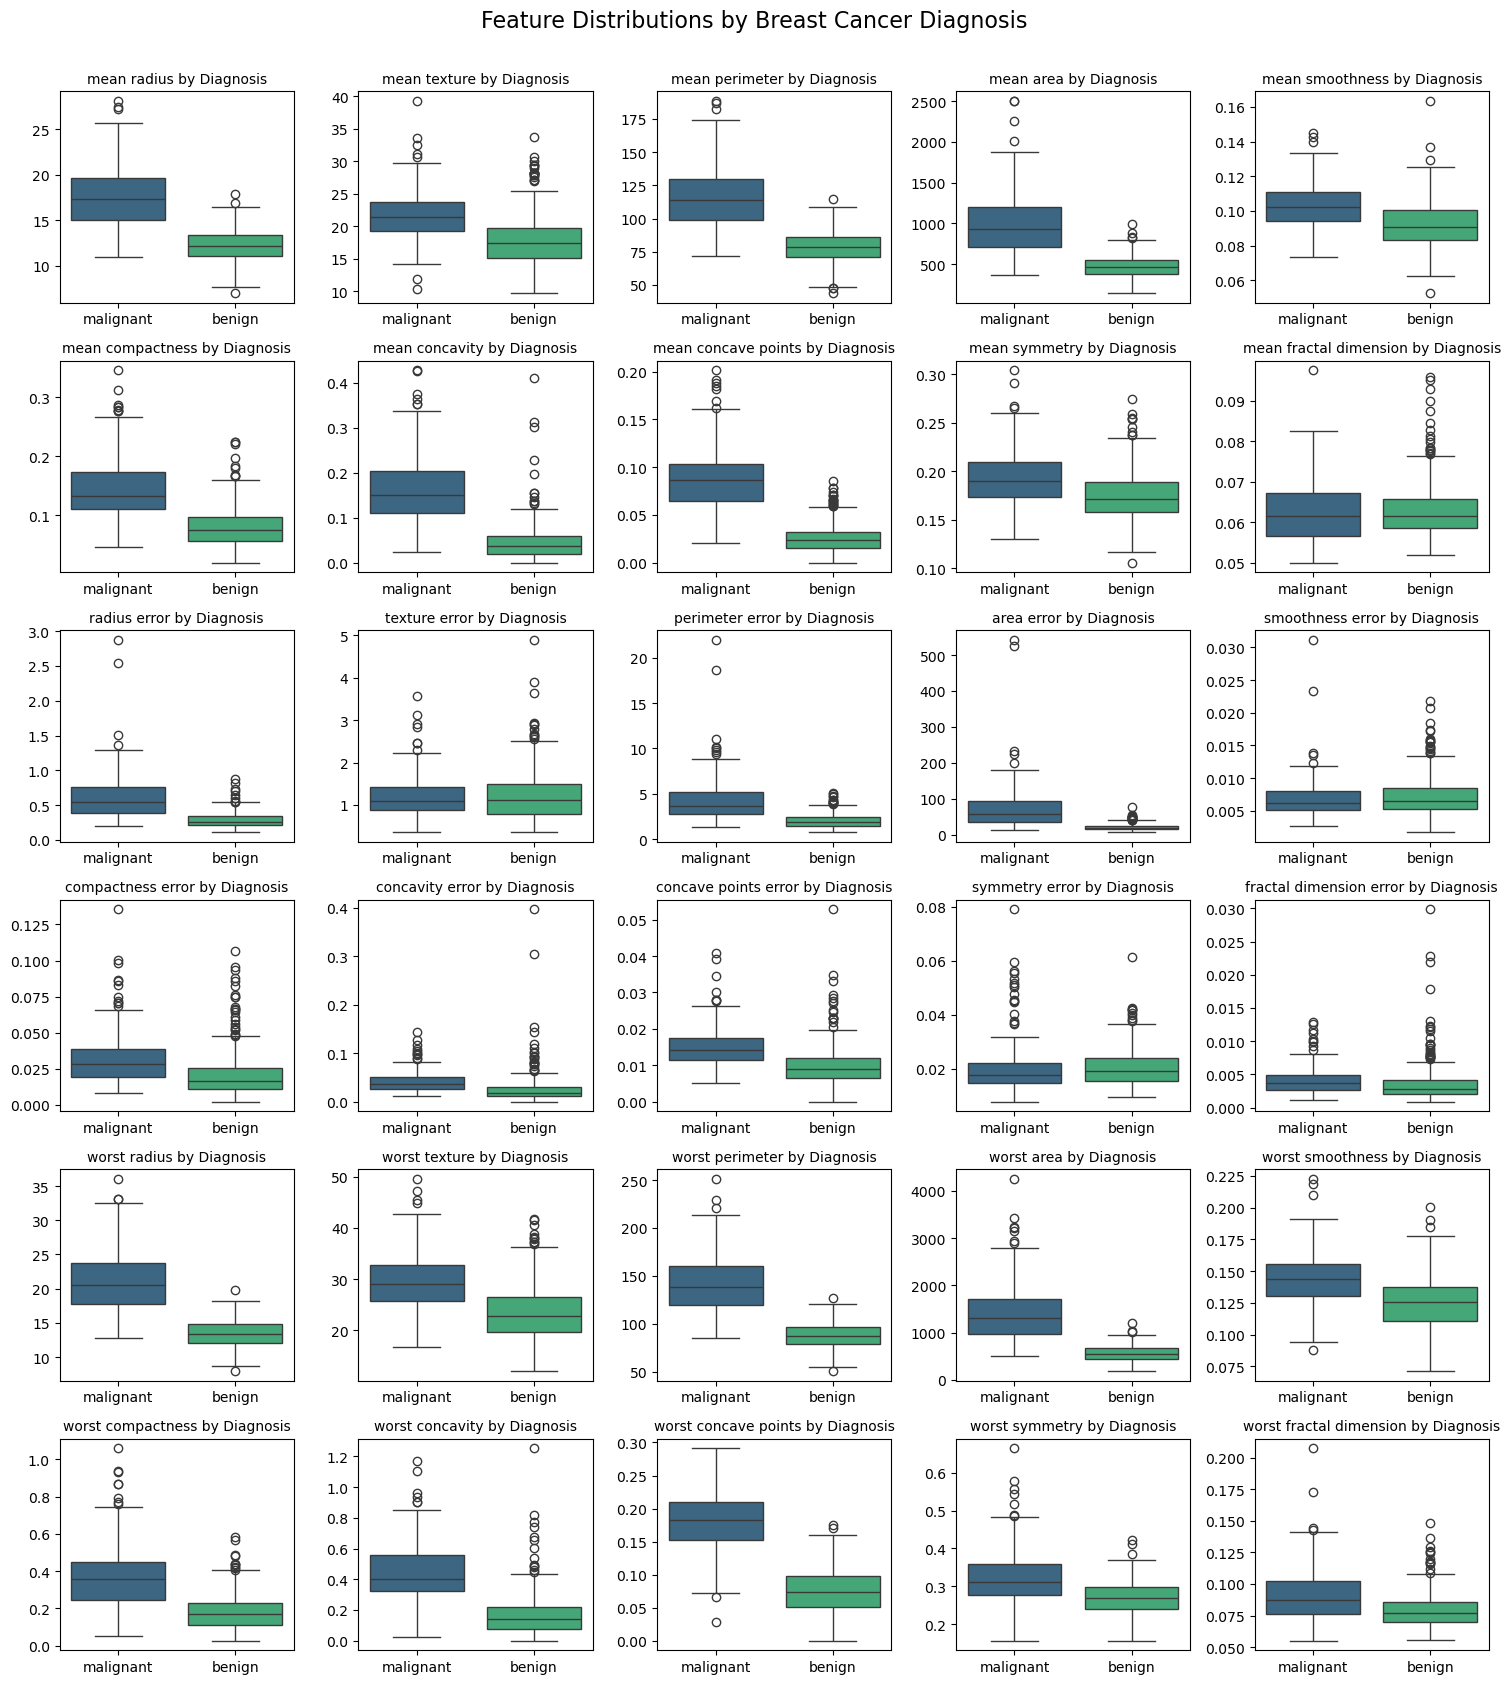

In [27]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*4))

axes = axes.flatten()

for i, feature_name in enumerate(df_features.columns):
    ax = axes[i]
    
    sns.boxplot(x='diagnosis', y=feature_name, hue="diagnosis", data=df, ax=ax, palette="viridis")
    ax.set_title(f"{feature_name} by Diagnosis", fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')


plt.tight_layout(rect=[0, 0.3, 1, 0.98])
plt.suptitle('Feature Distributions by Breast Cancer Diagnosis', y=1.00, fontsize=16)
plt.savefig("images/Feature-Distributions-by-Breast-Cancer-Diagnosis.png", transparent=True)
plt.show()

## 3.1 Feature Distribution

## 3.2 Correlation Analysis

## 4. Data Preprocessing

## 4.1 Handling Missing Values

## 4.2 Feature Scaling

## 5. Model Training

## 6. Model Evaluation

## 7. Conclusion